# Gaussian Processes




Let $\mathcal{F}$ a space of function going from $\mathcal{X}$ to $\mathcal{G}$. A gaussian process (GP) is a realization of a random variable following a Normal law. As we are in a space of function the gaussian process the mean and covariance are points dependants. Thus $f \sim \mathcal{N}(m(\cdot), k(\cdot, \cdot))$. More precisely, the subjacent random variable we are talking about is $f(x)$. Very important conceptually. And 
$$
m(x) = \mathbb{E}[f(x)] \text{     and   } k(x, x') = \mathbb{E}[(f(x) - m(x))(f(x') - m(x')) ]
$$

That's the prior. Now, let's imagine that we are in regression case where we seek to learn a function for which we have noisy evaluations, let's say $\mathcal{D}_n := (x_i, y_i)_{i = 1...n}$ with $y_i = f(x_i) + \epsilon, \epsilon \sim \mathcal{N}(0, \sigma_\epsilon^2)$.

We now have to fit our prior to the data. First step is to restrain our prior to a class of functions we can actually compute stuff with and basically *the specification of covariances functions implies a distributtion over functions*. Theses covariances functions are basically kernels.
For example, the squared exponential kernel : $k(x, x') = \sigma_f e^{\frac{|x-x'|^2}{\sigma_l}}$. As we know, its leads to infinite-dimensionnal rkhs so we good for most cases

Now, amongst all the possible realizations we need to keep the ones going through our points. ($*$ exposant is for testing samples or future evaluations)

The trick is :
$$
(y, f_*) \sim \mathcal{N}(0, [K(X,X)+\sigma_\epsilon, K(X,X_*) \\K(X,X_*),  K(X_*, X_*)])
$$

We isolate $f_* | y, X, X_*$ (calculation are doable as yes are basically pointwise) and we get the posterior and values and stuff so freaking cool .


## Example

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
sigma_eps = 0.2

X = np.random.uniform(-10., 10., size=30)
f = lambda x: 0.1 * (x/7)**2 + np.sin(x/.5) + 1.3*np.random.normal(0., sigma_eps, size=1)
y = [f(x) for x in X]


def covariance_function(sigma_f:float, sigma_l: float):
    def cov(x1, x2):
        if isinstance(x1, np.ndarray) and isinstance(x2, np.ndarray):
            return sigma_f**2 * np.exp(-(x1[:, None] - x2[None, :])**2 / (2 * sigma_l**2))
        return sigma_f**2 * np.exp(-(x1 - x2)**2 / (2 * sigma_l**2))
    return cov

cov = covariance_function(1., 1.)

posterior_mean_function = lambda x: cov(x, X)@np.linalg.inv(cov(X, X)+sigma_eps * np.eye(X.shape[0]))@y
posterior_variance_function = lambda x: cov(x, x) - cov(x, X)@np.linalg.inv(cov(X, X)+sigma_eps * np.eye(X.shape[0]))@cov(X, x)


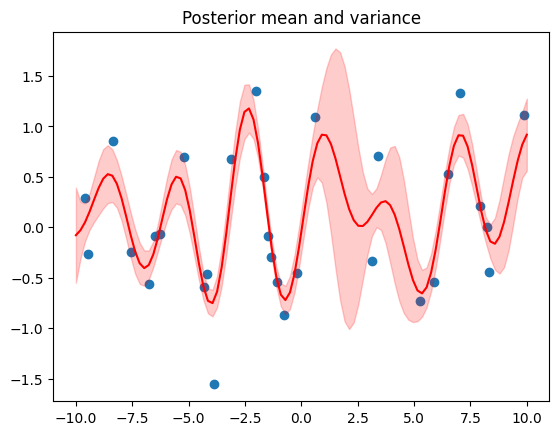

In [60]:
x = np.linspace(-10., 10., 100)
y_mean = np.array([posterior_mean_function(x_) for x_ in x]).flatten()
y_var = np.array([posterior_variance_function(x_) for x_ in x]).flatten()


plt.scatter(X, y)
plt.plot(x, y_mean, color='red')
plt.fill_between(x, y_mean - 2*y_var, y_mean + 2*y_var, color='red', alpha=0.2)

plt.title('Posterior mean and variance')
plt.show()

As you can see in the example, you also get the error, the alea. Bayesian approaches are cool

## References:

[1] Rasmussen, C. E., Williams, C. K. I. (2006). Gaussian processes for machine learning.. MIT Press. ISBN: 026218253X